# Simple Image Manipulation

In [1]:
# Uncomment and run the code below for installing scikit for the first time

# When using anaconda run teh following code:
#!conda install -c anaconda scikit-image

# If you are not using anaconda 
#!pip install scikit-image

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage.morphology import square
from scipy import ndimage
from skimage import draw
from skimage import io


## Loading and displaying an image
For this example I will be using the first image I took during my microscopy induction.

The image is called 'neurons' and it is available in this repository inside the 'Images' folder.

Text(0.5, 1.0, 'Original image')

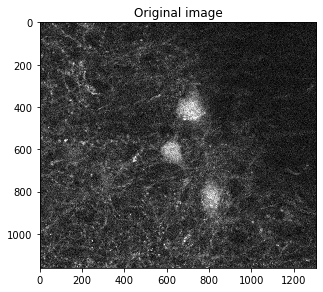

In [3]:
img_neurons = rgb2gray(img_as_ubyte(imread("./Images/neurons.jpg")))
img_neurons = img_as_ubyte(img_neurons)

plt.figure()
imshow(img_neurons)
plt.title("Original image")

## Re-scaling an image

Text(0.5, 1.0, 'Rescaled image')

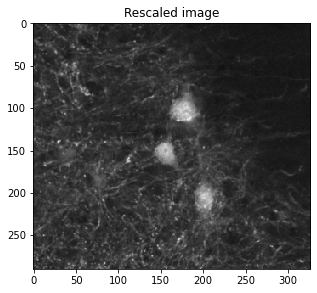

In [4]:
img_neurons_rescaled = rescale(img_neurons, 0.25)
plt.figure()
imshow(img_neurons_rescaled)
plt.title('Rescaled image')

## Converting an image to grayscale

<ipython-input-5-0b668ab6e65f>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_neurons_gray = rgb2gray(img_neurons_rescaled)


Text(0.5, 1.0, 'Grayscale image')

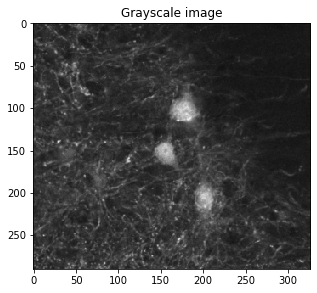

In [5]:
img_neurons_gray = rgb2gray(img_neurons_rescaled)
plt.figure()
imshow(img_neurons_gray)
plt.title('Grayscale image')

## Plotting the histogram of an image

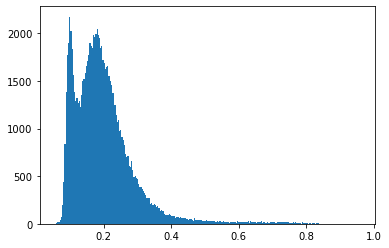

In [6]:
data = plt.hist(img_neurons_rescaled.ravel(), bins = 256)
plt.show()


## Plotting several figures at one


Text(0.5, 1.0, 'Histogram of grayscale image')

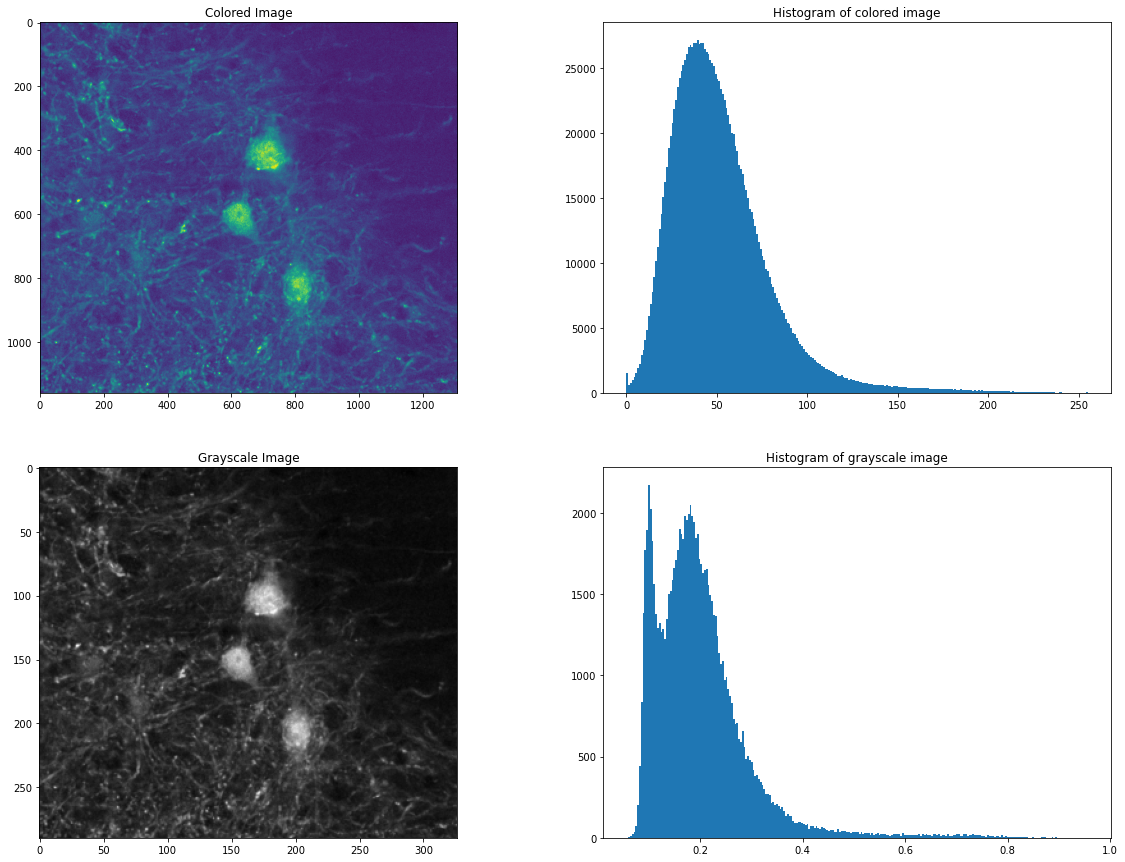

In [7]:
# create figure with 2x2 subplots
fig, ax = plt.subplots(2,2, figsize=(20,15))

# fill each subplot
ax[0,0].imshow(img_neurons)
ax[0,1].hist(img_neurons.ravel(), bins = 256);

ax[1,0].imshow(img_neurons_gray, cmap = 'gray')
ax[1,1].hist(img_neurons_gray.ravel(), bins = 256);


# we can add titles to subplots
ax[0,0].set_title('Colored Image')
ax[0,1].set_title('Histogram of colored image')
ax[1,0].set_title('Grayscale Image')
ax[1,1].set_title('Histogram of grayscale image')

## Threshold the image using Otsu's treshold 

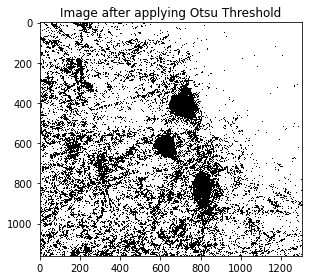

In [8]:
img_neurons_blackwhite = img_neurons <= threshold_otsu(img_neurons)
plt.figure(figsize=(10,4))
plt.title("Image after applying Otsu Threshold")
imshow(img_neurons_blackwhite)

## Removing noise from the image using morphological operators

Text(0.5, 1.0, 'Image after morphology operations')

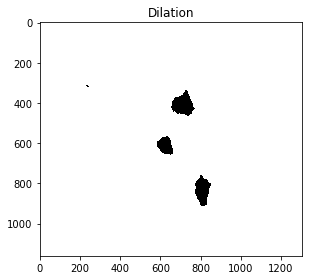

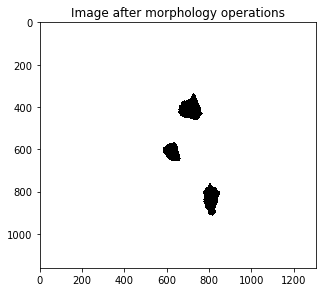

In [12]:
# Applying dilation
# Dilation expands the shapes in an image.
img_neurons_blackwhite = ndimage.binary_dilation(img_neurons_blackwhite, disk(4))
plt.figure()
plt.title('Dilation')
io.imshow (img_neurons_blackwhite)

# Removing noise using the 'opening' operator
img_neurons_blackwhite = binary_opening(img_neurons_blackwhite, disk(5))


# Filling gaps and holes using the 'closing' operator
img_neurons_blackwhite = binary_closing(img_neurons_blackwhite, disk(5))

plt.figure()
imshow(img_neurons_blackwhite)
plt.title('Image after morphology operations')

## Counting the number of neurons in the image


Region  0
Radius: 53.687019095813326
Center: (409.1637769188294, 710.0481501932634)

Region  1
Radius: 41.236045057616884
Center: (613.7506551853238, 622.5312616997379)

Region  2
Radius: 50.19385170660549
Center: (834.8720151610866, 806.982438408086)
Number of neurons in the image: 3


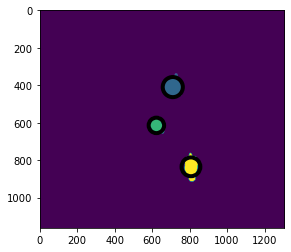

In [15]:

[img_neurons_labelled, regions] = label(img_neurons_blackwhite, background=1, return_num=True )

img_neurons_properties = regionprops(img_neurons_labelled)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(img_neurons_labelled)

no_of_neurons = 0
for i in range(len(img_neurons_properties)):
    print('\nRegion ', i)
    
    radius = img_neurons_properties[i].equivalent_diameter/2
    center = img_neurons_properties[i].centroid 
    axis_lenth = img_neurons_properties[i].major_axis_length
    
    if axis_lenth < 3*radius:
        no_of_neurons += 1
        print('Radius:',radius)
        print('Center:', center)
        circle = plt.Circle((center[1], center[0]), radius, color='k', linewidth='4', fill=False)
        ax.add_patch(circle)
    else:
        print('Region is not a neuron.')
        
#print('\nNumber of regions identified:', regions)

print('Number of neurons in the image:', no_of_neurons)



You can also try repeating the code using the 'coins.jpeg' image avaialable in the Images folder in this repository. 

In [17]:
img_coins = rgb2gray(img_as_ubyte(imread("./Images/coins.jpeg")))
